In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def find_criticals(df, arr, default, date_name):
    filter = abs(arr - np.mean(arr)) > (2*np.std(arr))
    critical_indices = np.where(filter)[0]+default
    critical_dates = np.array(df[date_name].to_list())[critical_indices]

    return critical_dates

In [38]:
def calculate_critical_dates(df, period, variable_name, date_name):
    diff_list = df[variable_name].diff(periods=period).to_list()

    default = 0
    for i,num in enumerate(diff_list):
        if not np.isnan(num):
            default = i
            break
    diff_list = diff_list[default:]

    arr = np.array(diff_list).astype(np.float64)

    critical_dates = find_criticals(df, arr, default, date_name)

    return critical_dates

In [4]:
df_doses_by_day = pd.read_csv("covid-vaccine-data-main\doses\doses-by-day.csv")

In [5]:
df_doses_by_day.head()

,DATE,ADMIN_DOSE1_DAILY,ADMIN_DOSE1_CUMULATIVE,ADMIN_DOSE2_DAILY,ADMIN_DOSE2_CUMULATIVE,ADMIN_SINGLE_DAILY,ADMIN_SINGLE_CUMULATIVE,ADMIN_ALLDOSES_DAILY,ADMIN_ALLDOSES_7DAYAVG,ADMIN_ALLDOSES_CUMULATIVE,INCOMPLETE
0,2020-12-14,79,79,0,0,0,0,79,NaN,79,0
1,2020-12-15,2051,2130,3,3,4,4,2058,NaN,2137,0
2,2020-12-16,4595,6725,14,17,1,5,4610,NaN,6747,0
3,2020-12-17,4653,11378,17,34,0,5,4670,NaN,11417,0
4,2020-12-18,5801,17179,24,58,2,7,5827,NaN,17244,0


In [6]:
df_doses_by_day["DATE"] = pd.to_datetime(df_doses_by_day["DATE"])

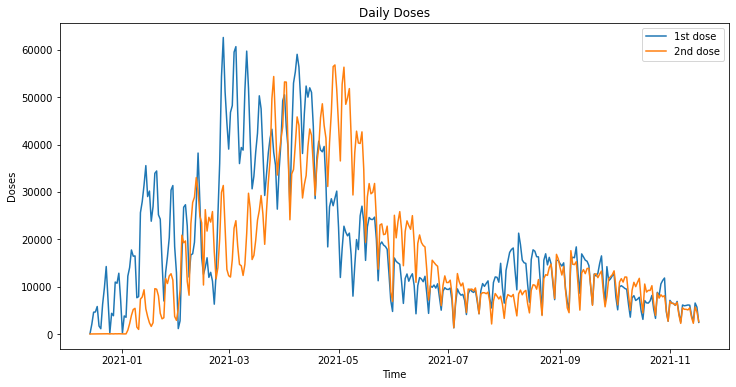

In [15]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(df_doses_by_day.DATE, df_doses_by_day.ADMIN_DOSE1_DAILY, label="1st dose")
ax.plot(df_doses_by_day.DATE, df_doses_by_day.ADMIN_DOSE2_DAILY, label="2nd dose")
ax.set_xlabel('Time')
ax.set_ylabel('Doses')
plt.legend()
plt.title("Daily Doses")
plt.savefig("original_data.png")

In [9]:
df_doses_by_day['dose1_smoothed'] = df_doses_by_day.ADMIN_DOSE1_DAILY.rolling(window=7).mean()
df_doses_by_day['dose2_smoothed'] = df_doses_by_day.ADMIN_DOSE2_DAILY.rolling(window=7).mean()

In [10]:
df_doses_by_day

,DATE,ADMIN_DOSE1_DAILY,ADMIN_DOSE1_CUMULATIVE,ADMIN_DOSE2_DAILY,ADMIN_DOSE2_CUMULATIVE,ADMIN_SINGLE_DAILY,ADMIN_SINGLE_CUMULATIVE,ADMIN_ALLDOSES_DAILY,ADMIN_ALLDOSES_7DAYAVG,ADMIN_ALLDOSES_CUMULATIVE,INCOMPLETE,dose1_smoothed,dose2_smoothed
0,2020-12-14,79,79,0,0,0,0,79,NaN,79,0,NaN,NaN
1,2020-12-15,2051,2130,3,3,4,4,2058,NaN,2137,0,NaN,NaN
2,2020-12-16,4595,6725,14,17,1,5,4610,NaN,6747,0,NaN,NaN
3,2020-12-17,4653,11378,17,34,0,5,4670,NaN,11417,0,NaN,NaN
4,2020-12-18,5801,17179,24,58,2,7,5827,NaN,17244,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,2021-11-13,3895,6189945,3536,5521034,419,538195,7850,10507.71,12249174,120000,5245.142857,4615.714286
335,2021-11-14,2569,6192514,2253,5523287,291,538486,5113,10476.29,12254287,120000,5252.000000,4617.857143
336,2021-11-15,6536,6199050,5685,5528972,615,539101,12836,10526.71,12267123,120000,5311.571429,4641.142857
337,2021-11-16,5665,6204715,4690,5533662,558,539659,10913,10398.43,12278036,120000,5270.000000,4566.571429


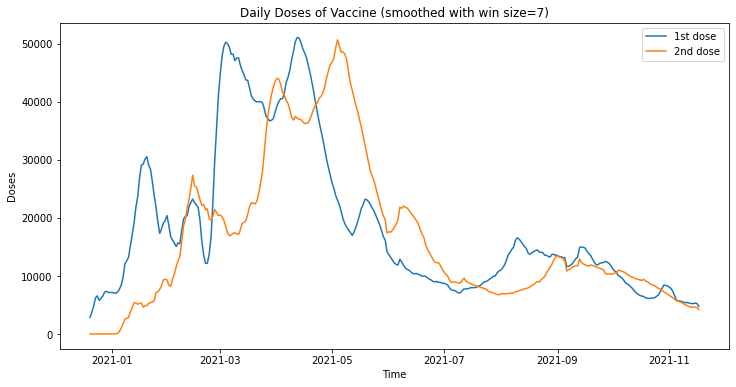

In [14]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(df_doses_by_day.DATE, df_doses_by_day.dose1_smoothed, label="1st dose")
ax.plot(df_doses_by_day.DATE, df_doses_by_day.dose2_smoothed, label='2nd dose')
ax.set_xlabel('Time')
ax.set_ylabel('Doses')
ax.legend()
plt.title("Daily Doses of Vaccine (smoothed with win size=7)")
plt.savefig("smoothed_doses.png")

Text(0.5, 1.0, 'Smoothed Daily Doses of Vaccination by Differencing')

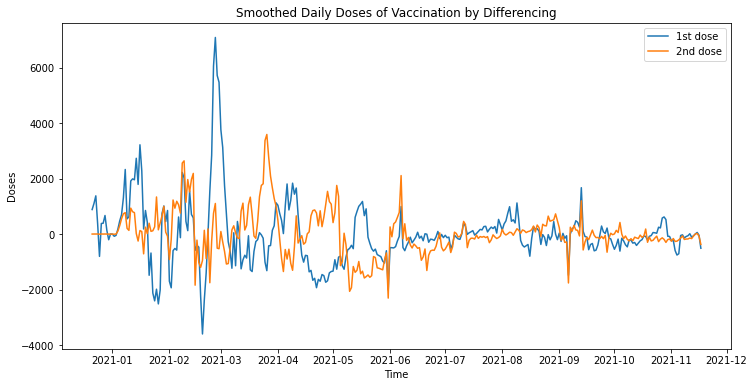

In [12]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(df_doses_by_day.DATE, df_doses_by_day.dose1_smoothed.diff(),label="1st dose")
ax.plot(df_doses_by_day.DATE, df_doses_by_day.dose2_smoothed.diff(),label="2nd dose")
ax.set_xlabel('Time')
ax.set_ylabel('Doses')
ax.legend()
plt.title("Smoothed Daily Doses of Vaccination by Differencing")

In [21]:
dose1_diff_list = df_doses_by_day.dose1_smoothed.diff().to_list()
dose2_diff_list = df_doses_by_day.dose2_smoothed.diff().to_list()

In [24]:
dose1_default = 0
for i,num in enumerate(dose1_diff_list):
    if not np.isnan(num):
        dose1_default = i
        break

In [28]:
dose2_default = 0
for i,num in enumerate(dose2_diff_list):
    if not np.isnan(num):
        dose2_default = i
        break

In [30]:
dose1_diff_list = dose1_diff_list[dose1_default:]
dose2_diff_list = dose2_diff_list[dose2_default:]

In [31]:
dose1_np = np.array(dose1_diff_list).astype(np.float)
dose2_np = np.array(dose2_diff_list).astype(np.float)

C:\Users\Owner\AppData\Local\Temp/ipykernel_9772/2756090221.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dose1_np = np.array(dose1_diff_list).astype(np.float)
C:\Users\Owner\AppData\Local\Temp/ipykernel_9772/2756090221.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dose2_np = np.array(dose2_diff_list).astype(np.float)


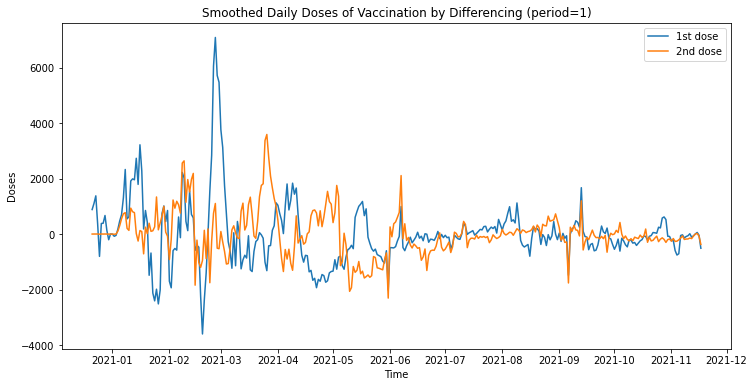

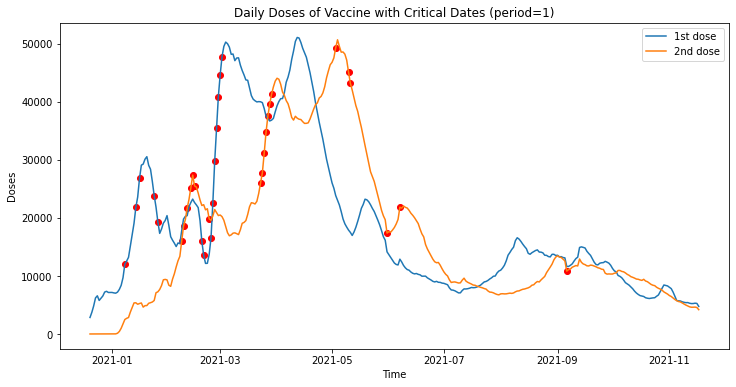

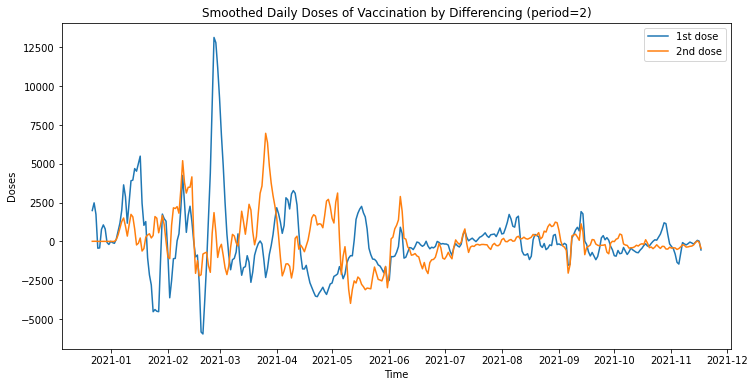

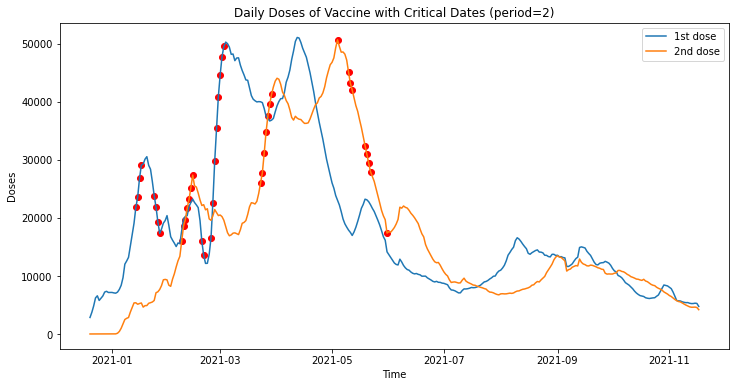

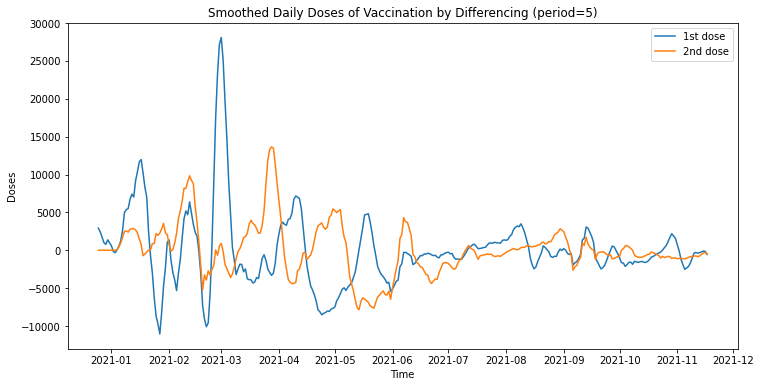

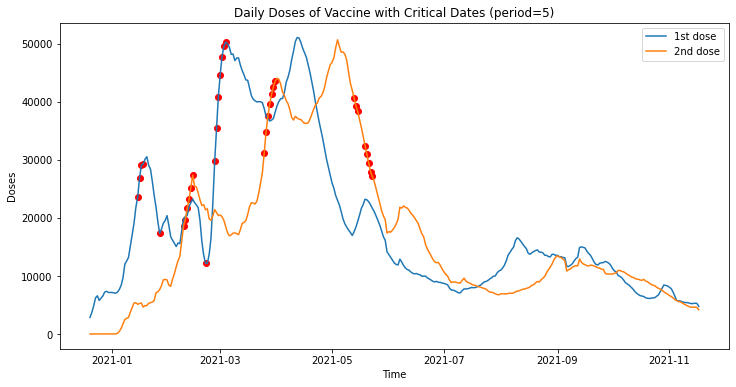

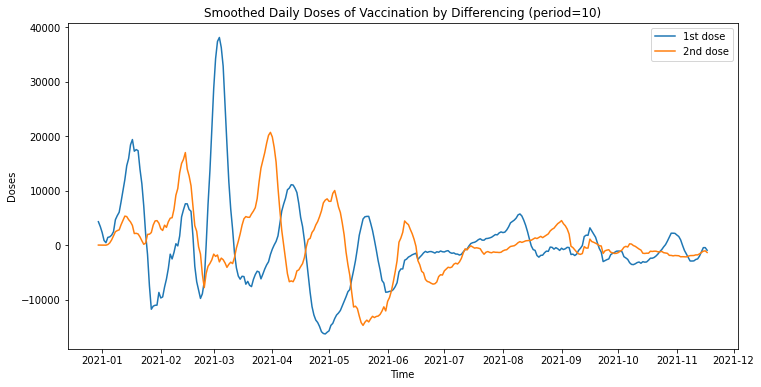

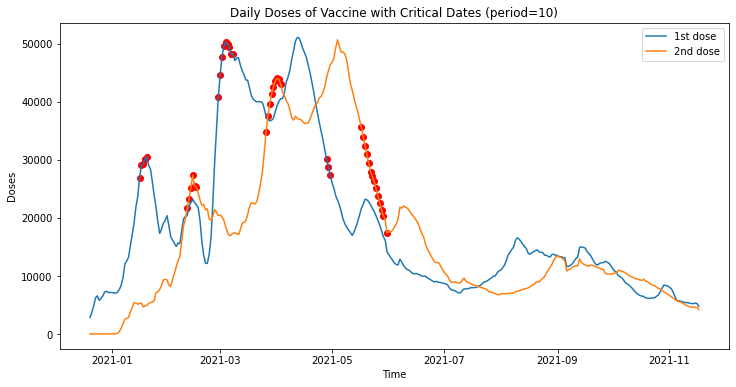

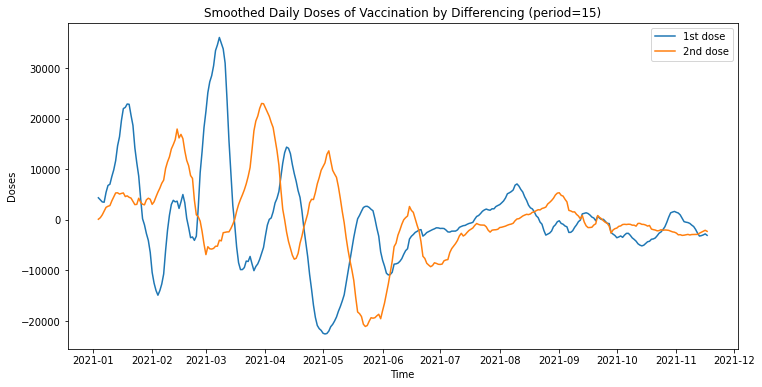

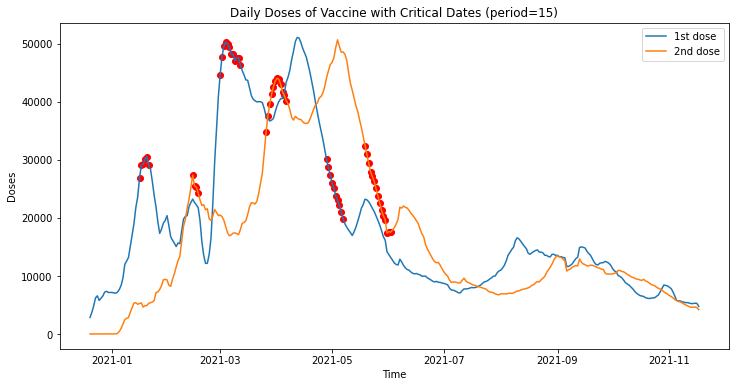

In [39]:
for period in [1,2,5,10,15]:
    dose1_critical_dates = calculate_critical_dates(df_doses_by_day, period, "dose1_smoothed", "DATE")
    dose2_critical_dates = calculate_critical_dates(df_doses_by_day, period, "dose2_smoothed", "DATE")

    time_list_1 = df_doses_by_day.dose1_smoothed.to_list()
    time_series_1 = pd.Series(time_list_1, index=df_doses_by_day.DATE)

    time_list_2 = df_doses_by_day.dose2_smoothed.to_list()
    time_series_2 = pd.Series(time_list_2, index=df_doses_by_day.DATE)

    fig,ax = plt.subplots(figsize=(12,6))
    ax.plot(df_doses_by_day.DATE, df_doses_by_day.dose1_smoothed.diff(periods=period),label="1st dose")
    ax.plot(df_doses_by_day.DATE, df_doses_by_day.dose2_smoothed.diff(periods=period),label="2nd dose")
    ax.set_xlabel('Time')
    ax.set_ylabel('Doses')
    ax.legend()
    plt.title("Smoothed Daily Doses of Vaccination by Differencing (period={})".format(period))
    plt.savefig("dose_diff_period{}".format(period))

    fig,ax = plt.subplots(figsize=(12,6))
    ax.plot(df_doses_by_day.DATE, df_doses_by_day.dose1_smoothed,label="1st dose")
    ax.plot(df_doses_by_day.DATE, df_doses_by_day.dose2_smoothed,label="2nd dose")
    for dot in dose1_critical_dates:
        plt.scatter(dot, time_series_1[dot],color='r')
    for dot in dose2_critical_dates:
        plt.scatter(dot, time_series_2[dot],color='r')
    ax.set_xlabel('Time')
    ax.set_ylabel('Doses')
    ax.legend()
    plt.title("Daily Doses of Vaccine with Critical Dates (period={})".format(period))
    plt.savefig("daily_dose_with_period{}".format(period))

In [21]:
df_doses = df_doses_by_day[['DATE','ADMIN_DOSE1_DAILY', 'ADMIN_DOSE2_DAILY', 'dose1_smoothed','dose2_smoothed']]

In [22]:
df_doses.to_csv("daily_doses.csv")

In [27]:
df_daily_cases = pd.read_csv("./coronavirus-data/trends/cases-by-day.csv")
df_daily_cases.columns

Index(['date_of_interest', 'CASE_COUNT', 'PROBABLE_CASE_COUNT',
       'CASE_COUNT_7DAY_AVG', 'ALL_CASE_COUNT_7DAY_AVG', 'BX_CASE_COUNT',
       'BX_PROBABLE_CASE_COUNT', 'BX_CASE_COUNT_7DAY_AVG',
       'BX_ALL_CASE_COUNT_7DAY_AVG', 'BK_CASE_COUNT', 'BK_PROBABLE_CASE_COUNT',
       'BK_CASE_COUNT_7DAY_AVG', 'BK_ALL_CASE_COUNT_7DAY_AVG', 'MN_CASE_COUNT',
       'MN_PROBABLE_CASE_COUNT', 'MN_CASE_COUNT_7DAY_AVG',
       'MN_ALL_CASE_COUNT_7DAY_AVG', 'QN_CASE_COUNT', 'QN_PROBABLE_CASE_COUNT',
       'QN_CASE_COUNT_7DAY_AVG', 'QN_ALL_CASE_COUNT_7DAY_AVG', 'SI_CASE_COUNT',
       'SI_PROBABLE_CASE_COUNT', 'SI_CASE_COUNT_7DAY_AVG',
       'SI_ALL_CASE_COUNT_7DAY_AVG', 'INCOMPLETE'],
      dtype='object')

In [28]:
df_daily_cases['date_of_interest'] = pd.to_datetime(df_daily_cases['date_of_interest'])

In [29]:
df_daily_cases.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_PROBABLE_CASE_COUNT,BX_CASE_COUNT_7DAY_AVG,BX_ALL_CASE_COUNT_7DAY_AVG,BK_CASE_COUNT,...,MN_ALL_CASE_COUNT_7DAY_AVG,QN_CASE_COUNT,QN_PROBABLE_CASE_COUNT,QN_CASE_COUNT_7DAY_AVG,QN_ALL_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,INCOMPLETE
0,2020-02-29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2020-03-04,5,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0


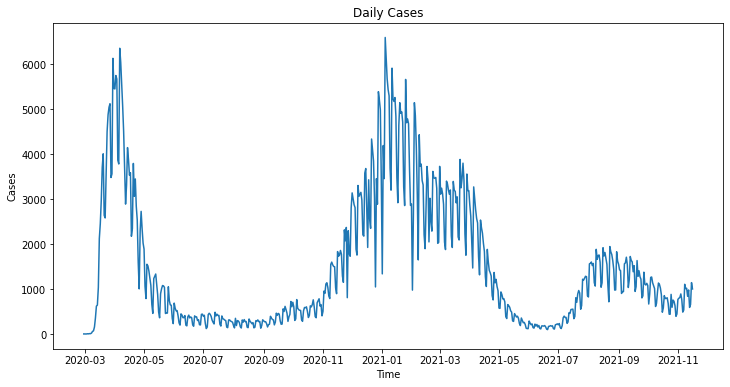

In [48]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(df_daily_cases.date_of_interest, df_daily_cases.CASE_COUNT)
ax.set_xlabel('Time')
ax.set_ylabel('Cases')
plt.title("Daily Cases")
plt.savefig("original_case.png")

In [34]:
df_daily_cases["case_smoothed"] = df_daily_cases["CASE_COUNT"].rolling(window=7).mean()

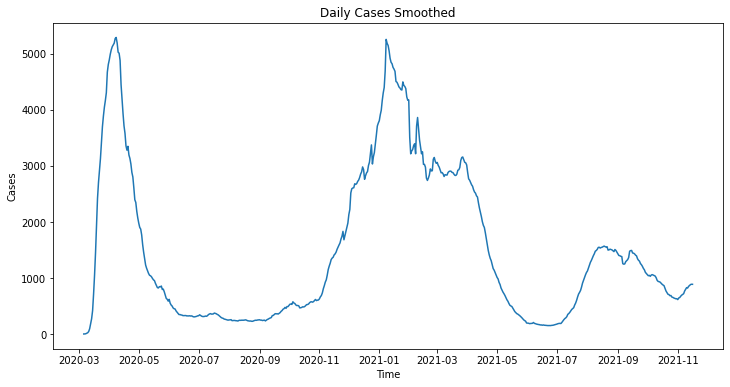

In [49]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(df_daily_cases.date_of_interest, df_daily_cases.case_smoothed)
ax.set_xlabel('Time')
ax.set_ylabel('Cases')
plt.title("Daily Cases Smoothed")
plt.savefig("smoothed_cases.png")

In [41]:
critical_dates = calculate_critical_dates(df_daily_cases, period=1, variable_name="case_smoothed",date_name="date_of_interest")

In [44]:
case_time_list = df_daily_cases.case_smoothed.to_list()
case_time_series = pd.Series(case_time_list, index=df_daily_cases.date_of_interest)

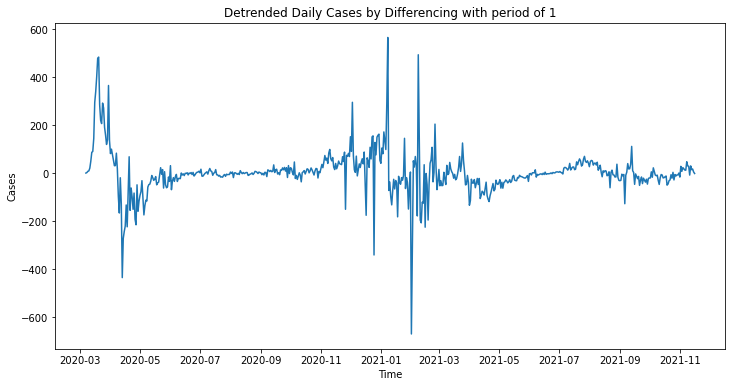

In [51]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(df_daily_cases.date_of_interest, df_daily_cases.case_smoothed.diff(periods=1))
ax.set_xlabel('Time')
ax.set_ylabel('Cases')
plt.title("Detrended Daily Cases by Differencing with period of 1")
plt.savefig("detrended_daily_cases.png")

No handles with labels found to put in legend.


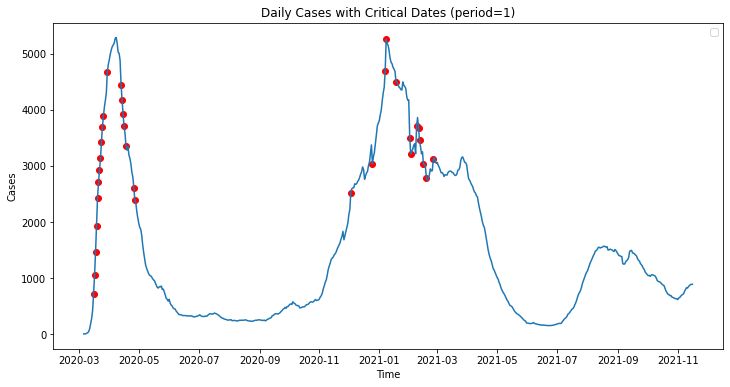

In [52]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(df_daily_cases.date_of_interest, df_daily_cases.case_smoothed)

for dot in critical_dates:
    plt.scatter(dot, case_time_series[dot],color='r')

ax.set_xlabel('Time')
ax.set_ylabel('Cases')
ax.legend()
plt.title("Daily Cases with Critical Dates (period={})".format(1))
plt.savefig("daily_cases_with_critical.png")